# 문제 1
- 카드 정렬하기
- https://www.acmicpc.net/problem/1715

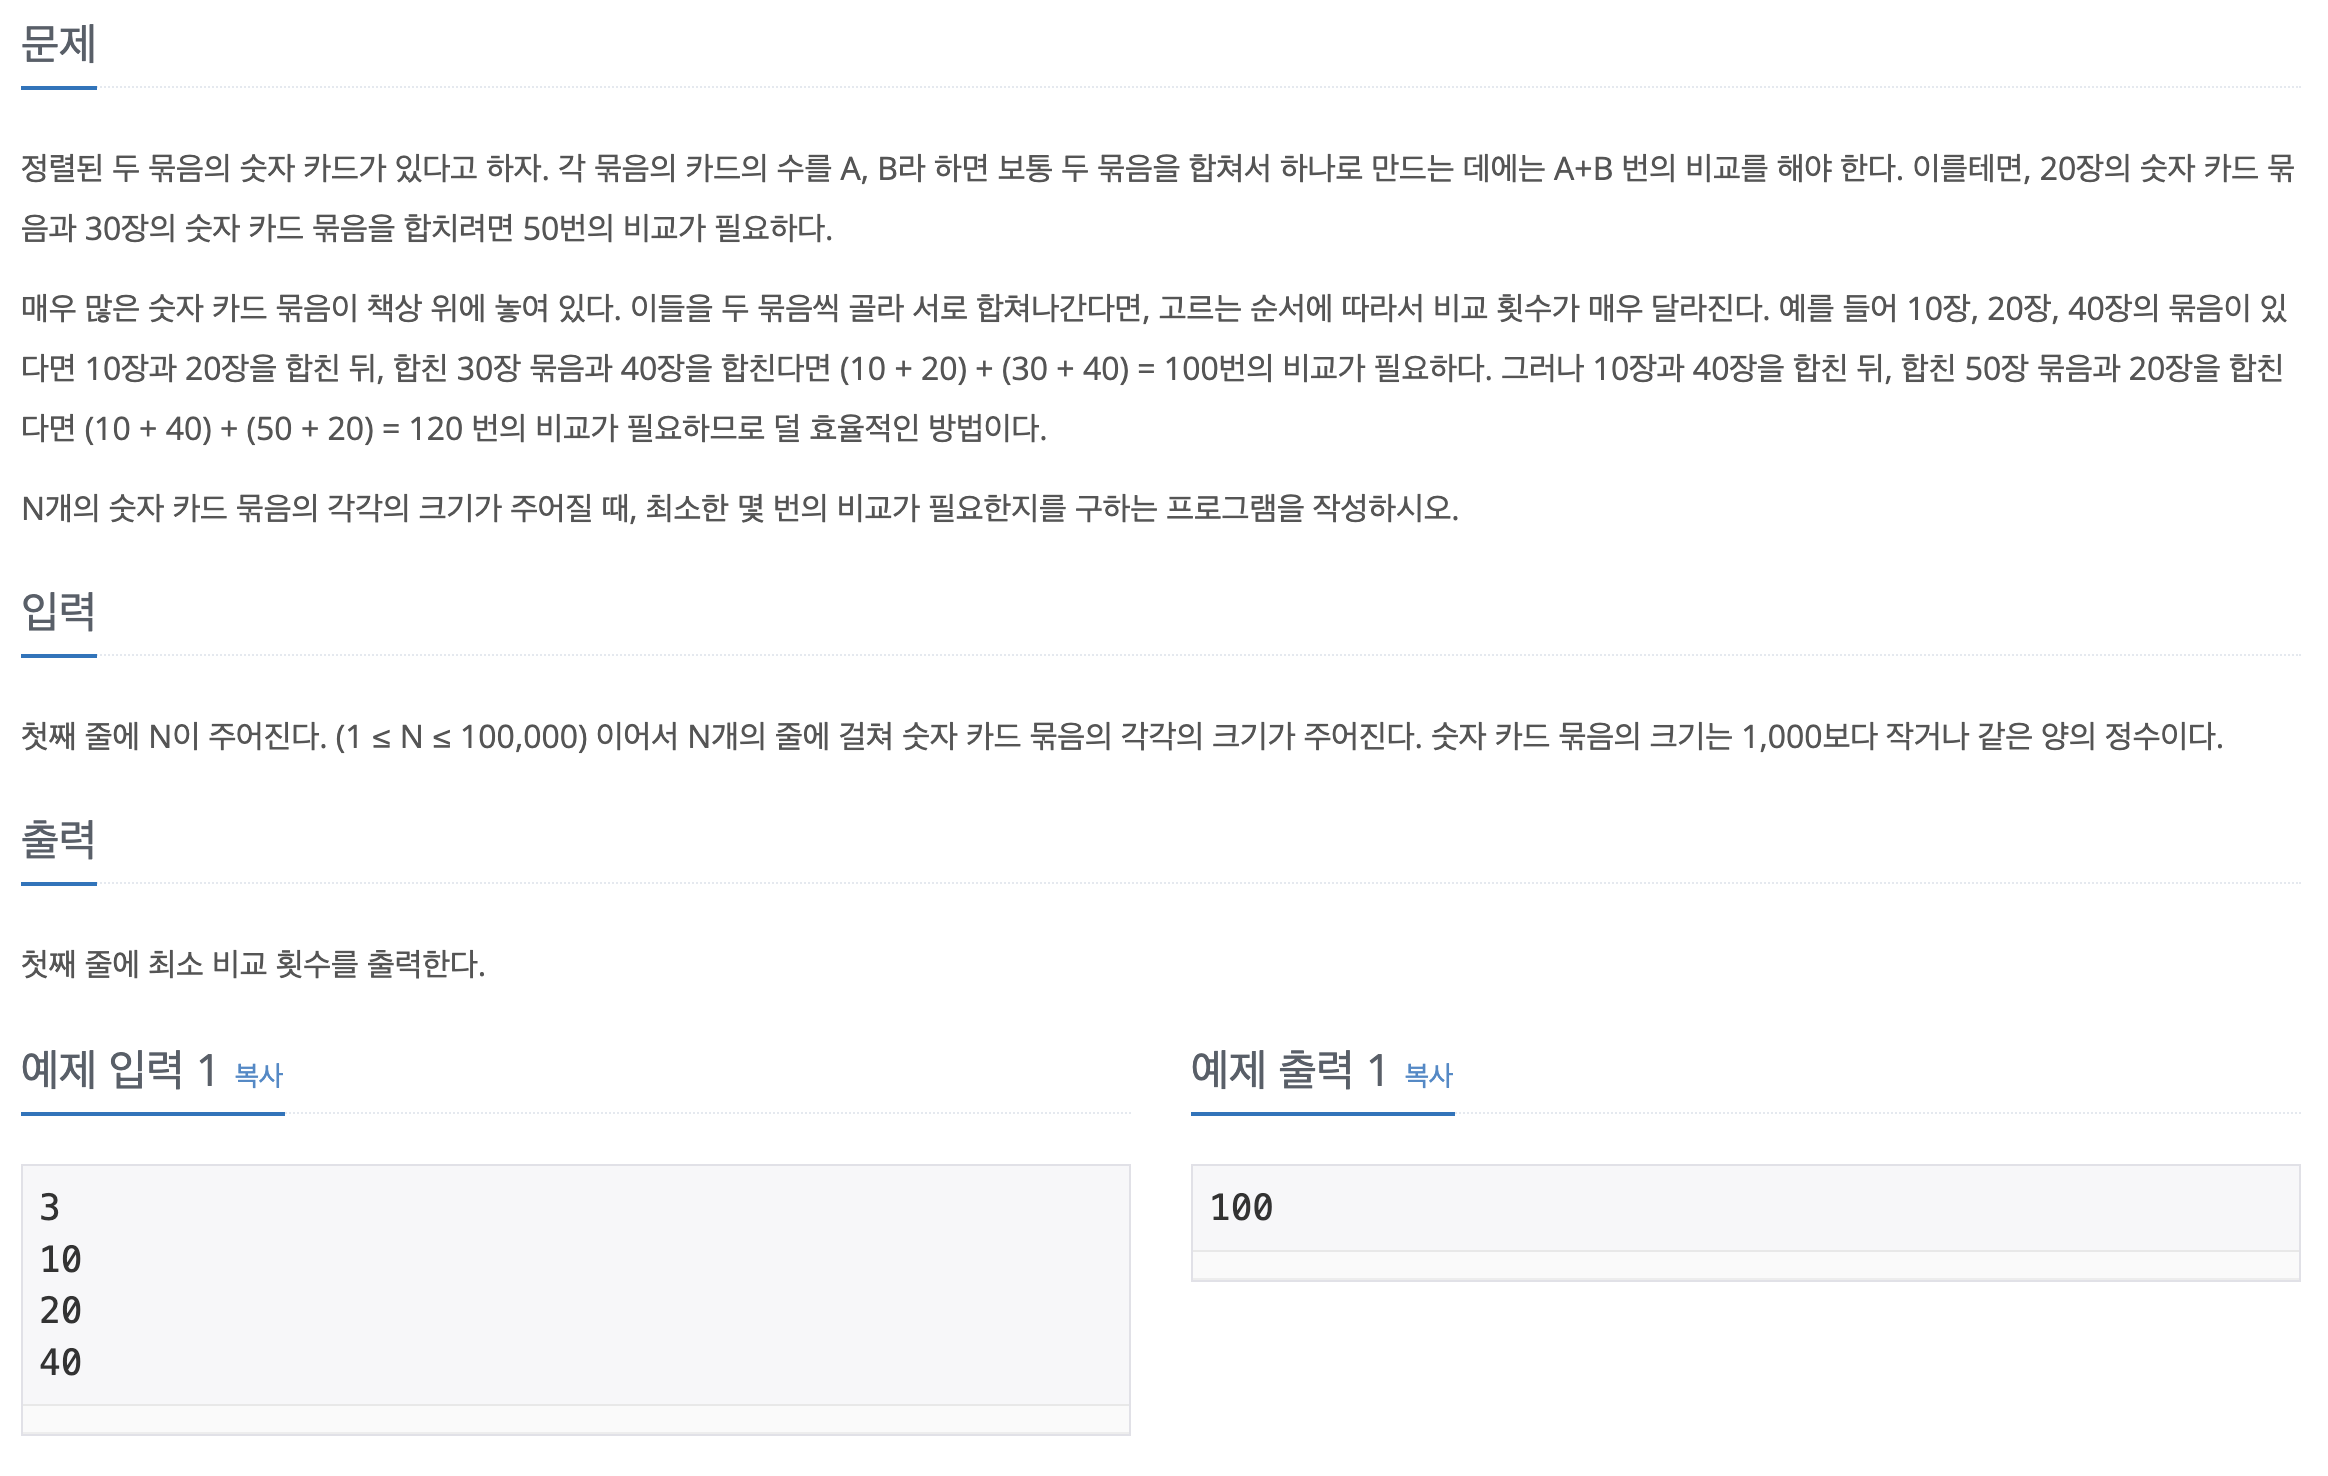

In [6]:
import sys
import heapq

input = sys.stdin.readline
n = int(input())
heap = []
for _ in range(n):
    heapq.heappush(heap, int(input()))
    
ans = 0
while len(heap)>2:
    a = heapq.heappop(heap)
    b = heapq.heappop(heap)
    heapq.heappush(heap, a+b)
    ans += (a+b)

if len(heap) >= 2:
    print(ans + sum(heap))
else:
    print(0)

8
1
2
3
4
5
6
1
10
86


# 문제 2
- 좀비 떼가 기관총 진지에도 오다니
- https://www.acmicpc.net/problem/19644

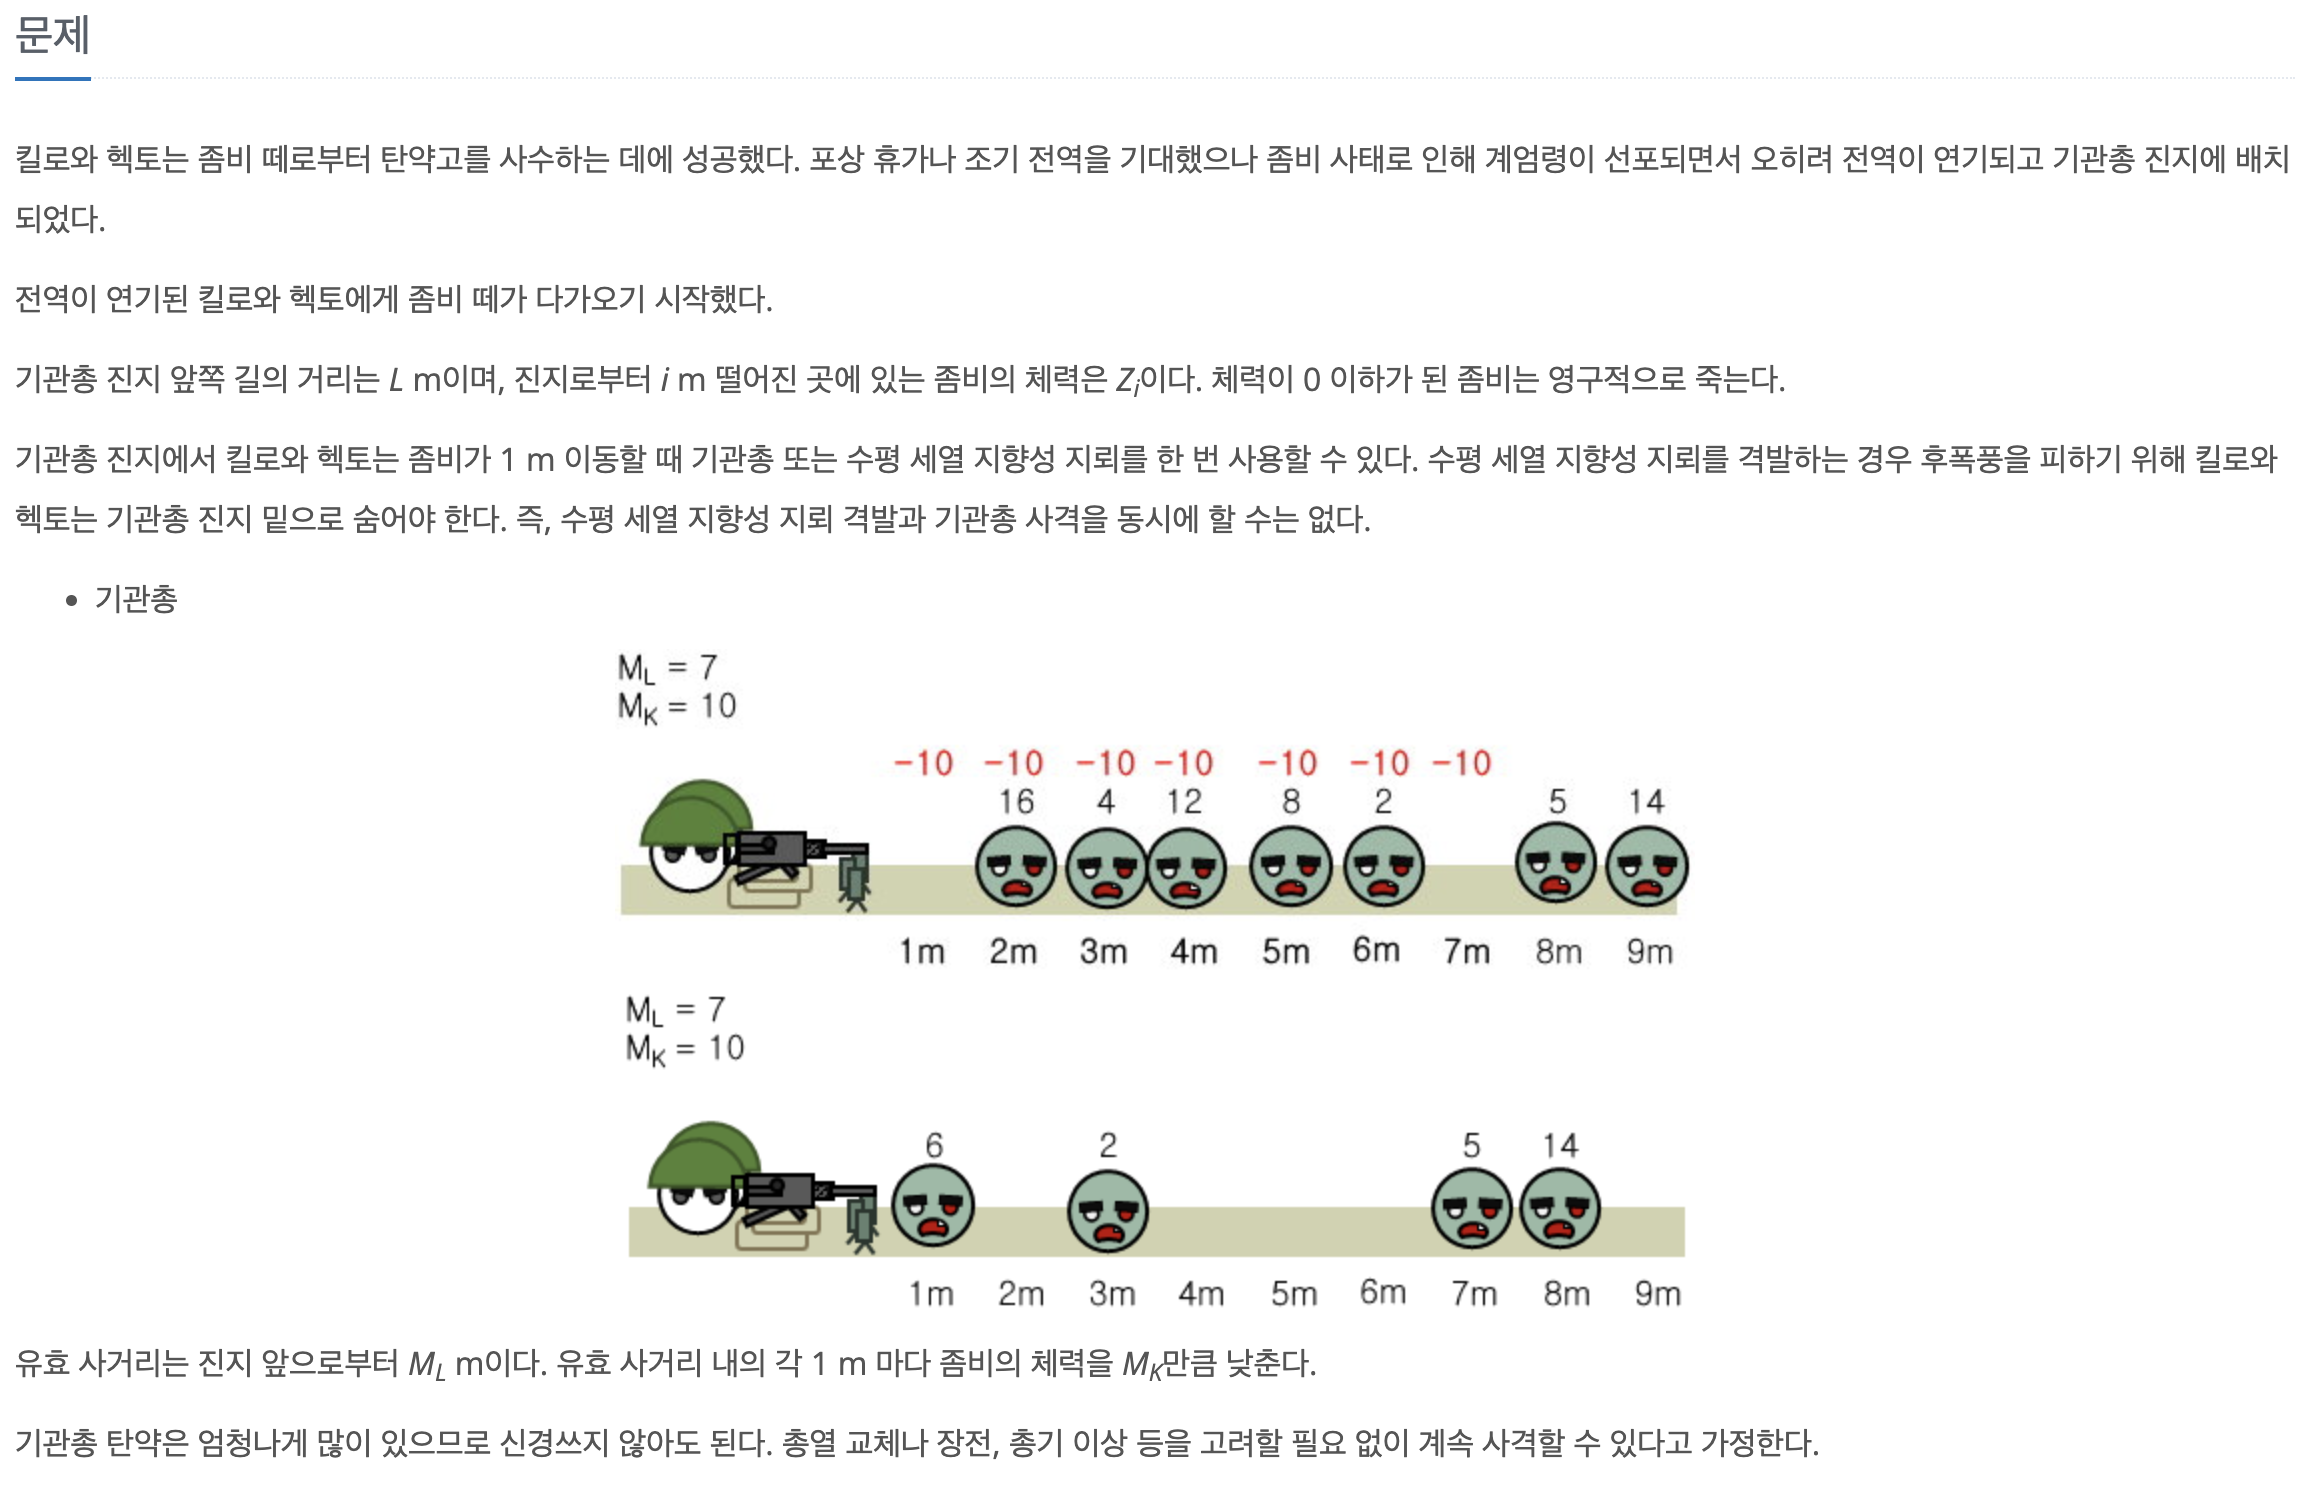
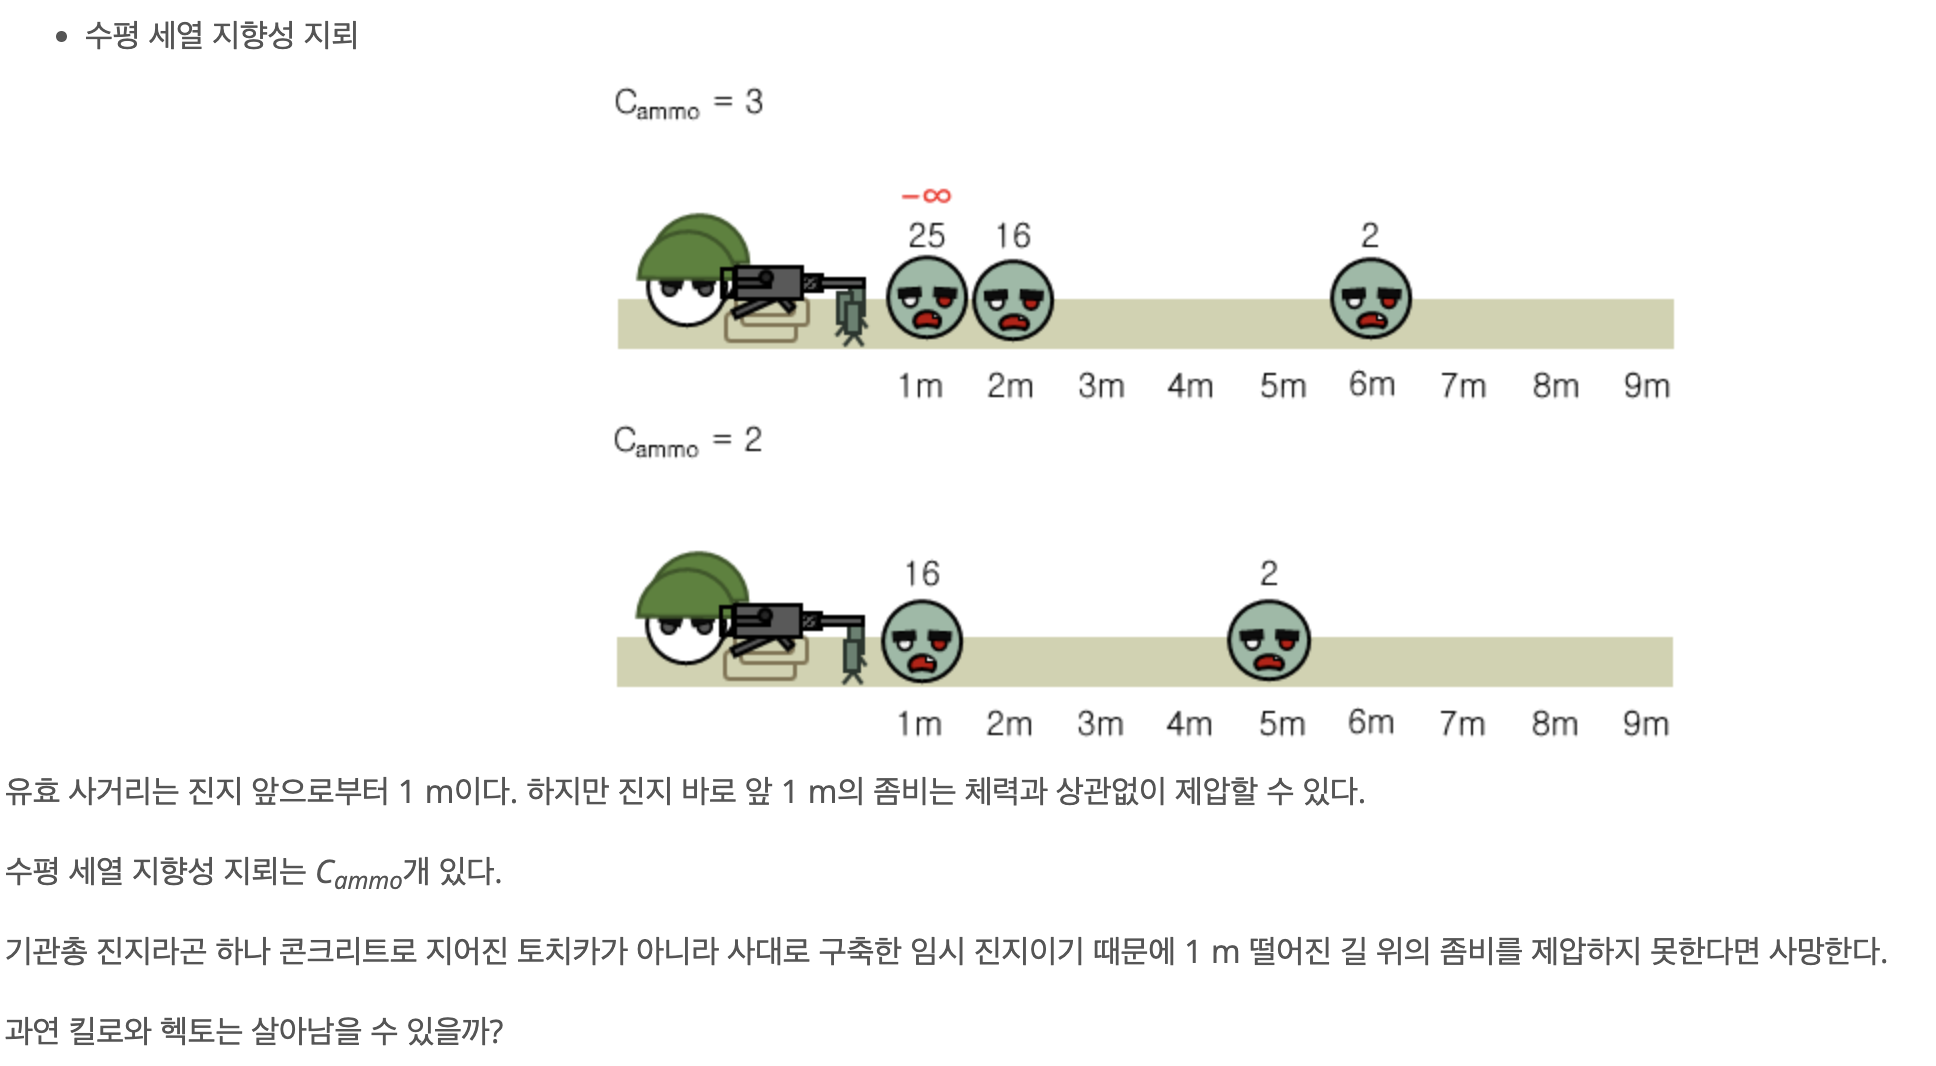
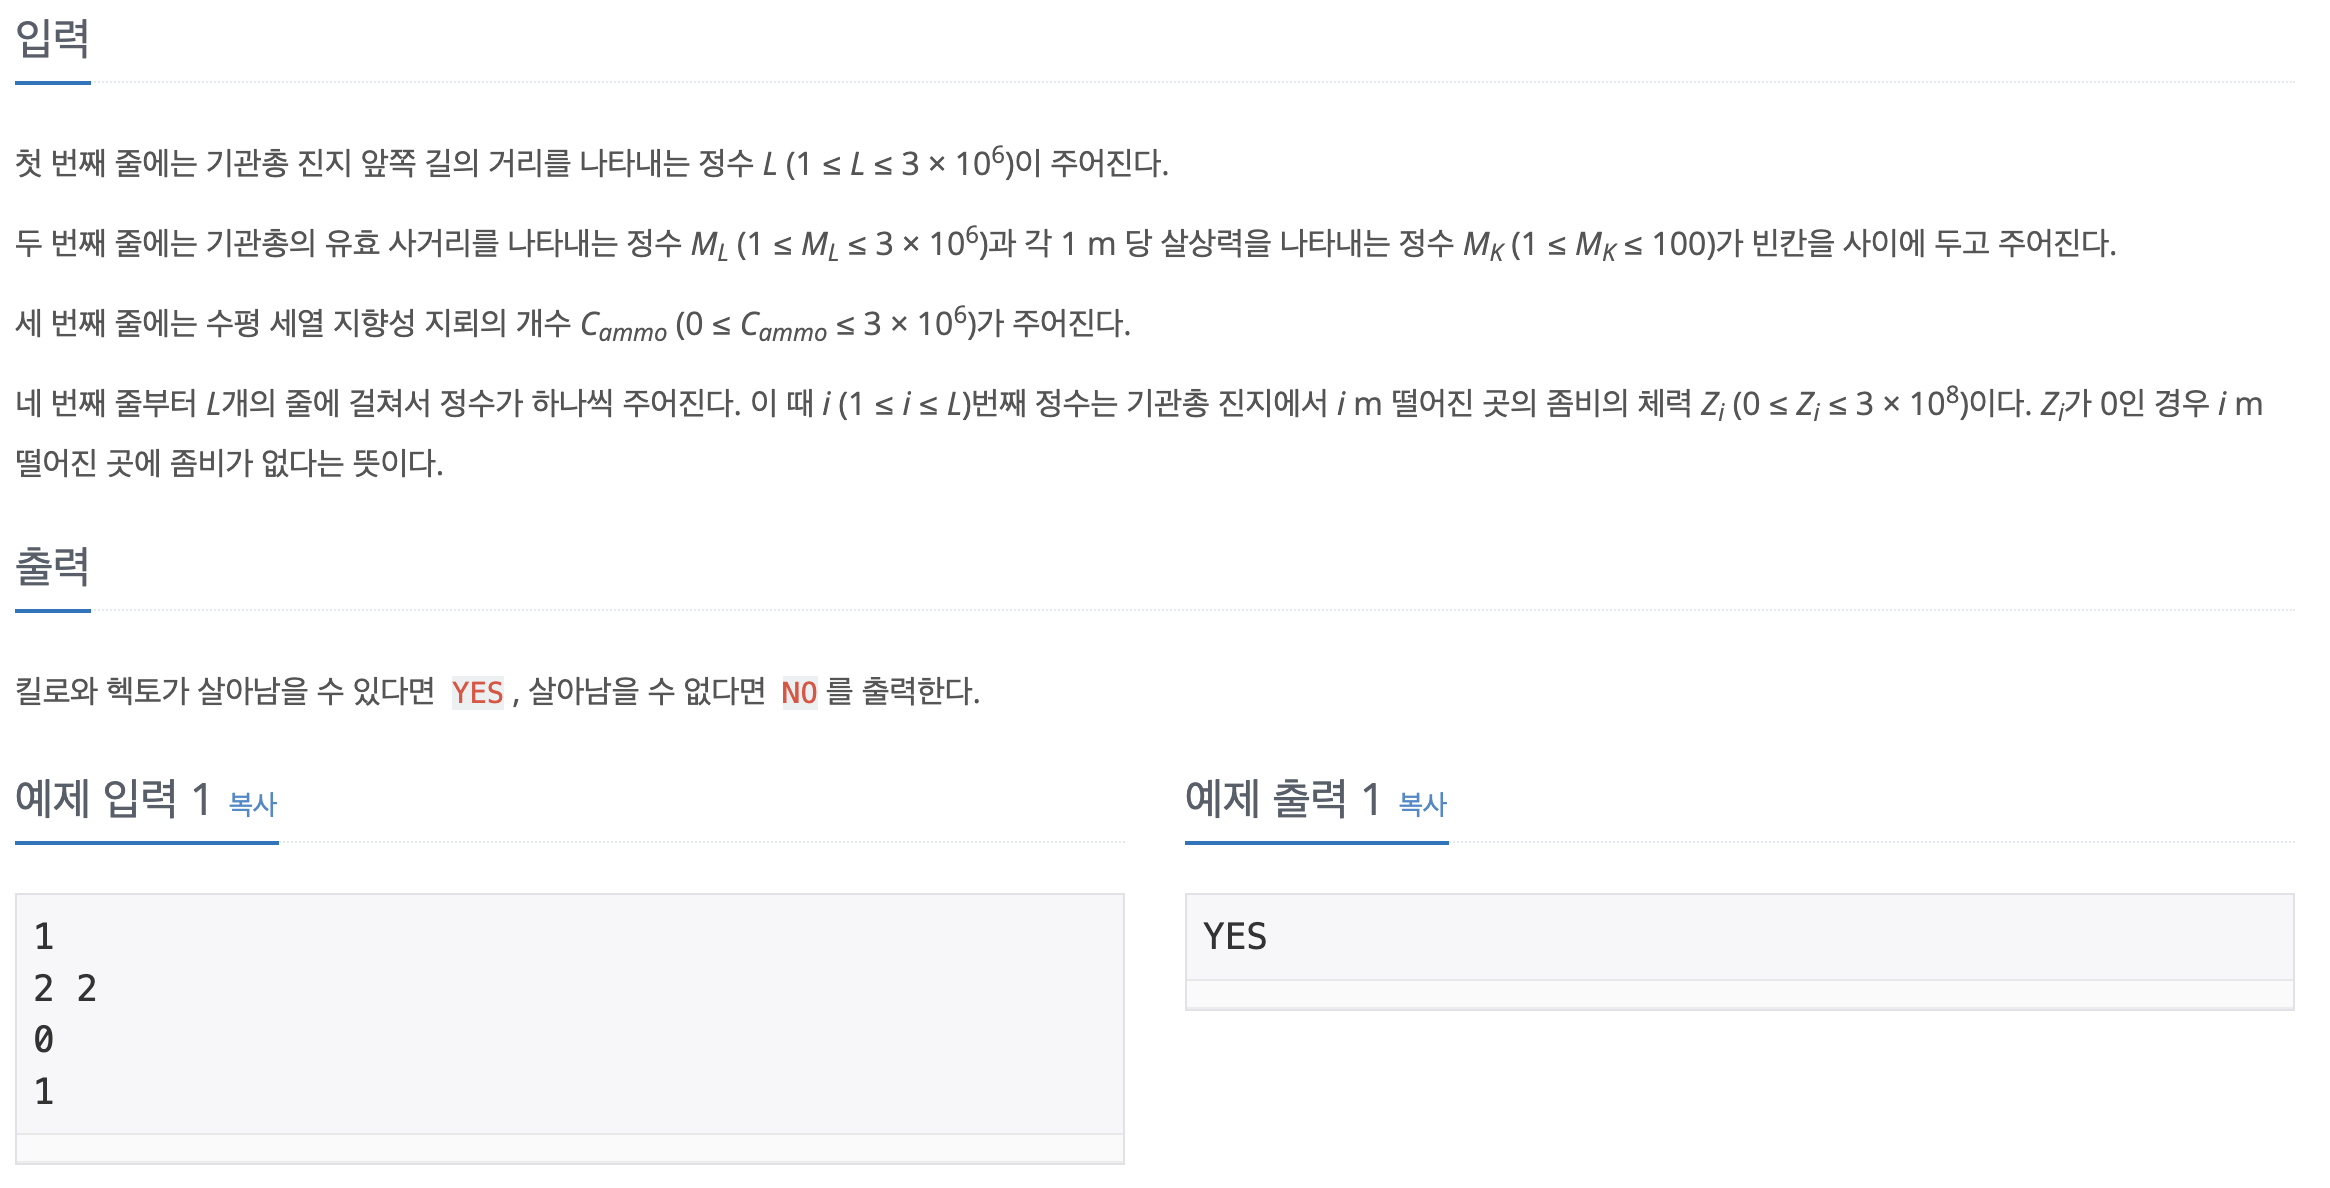
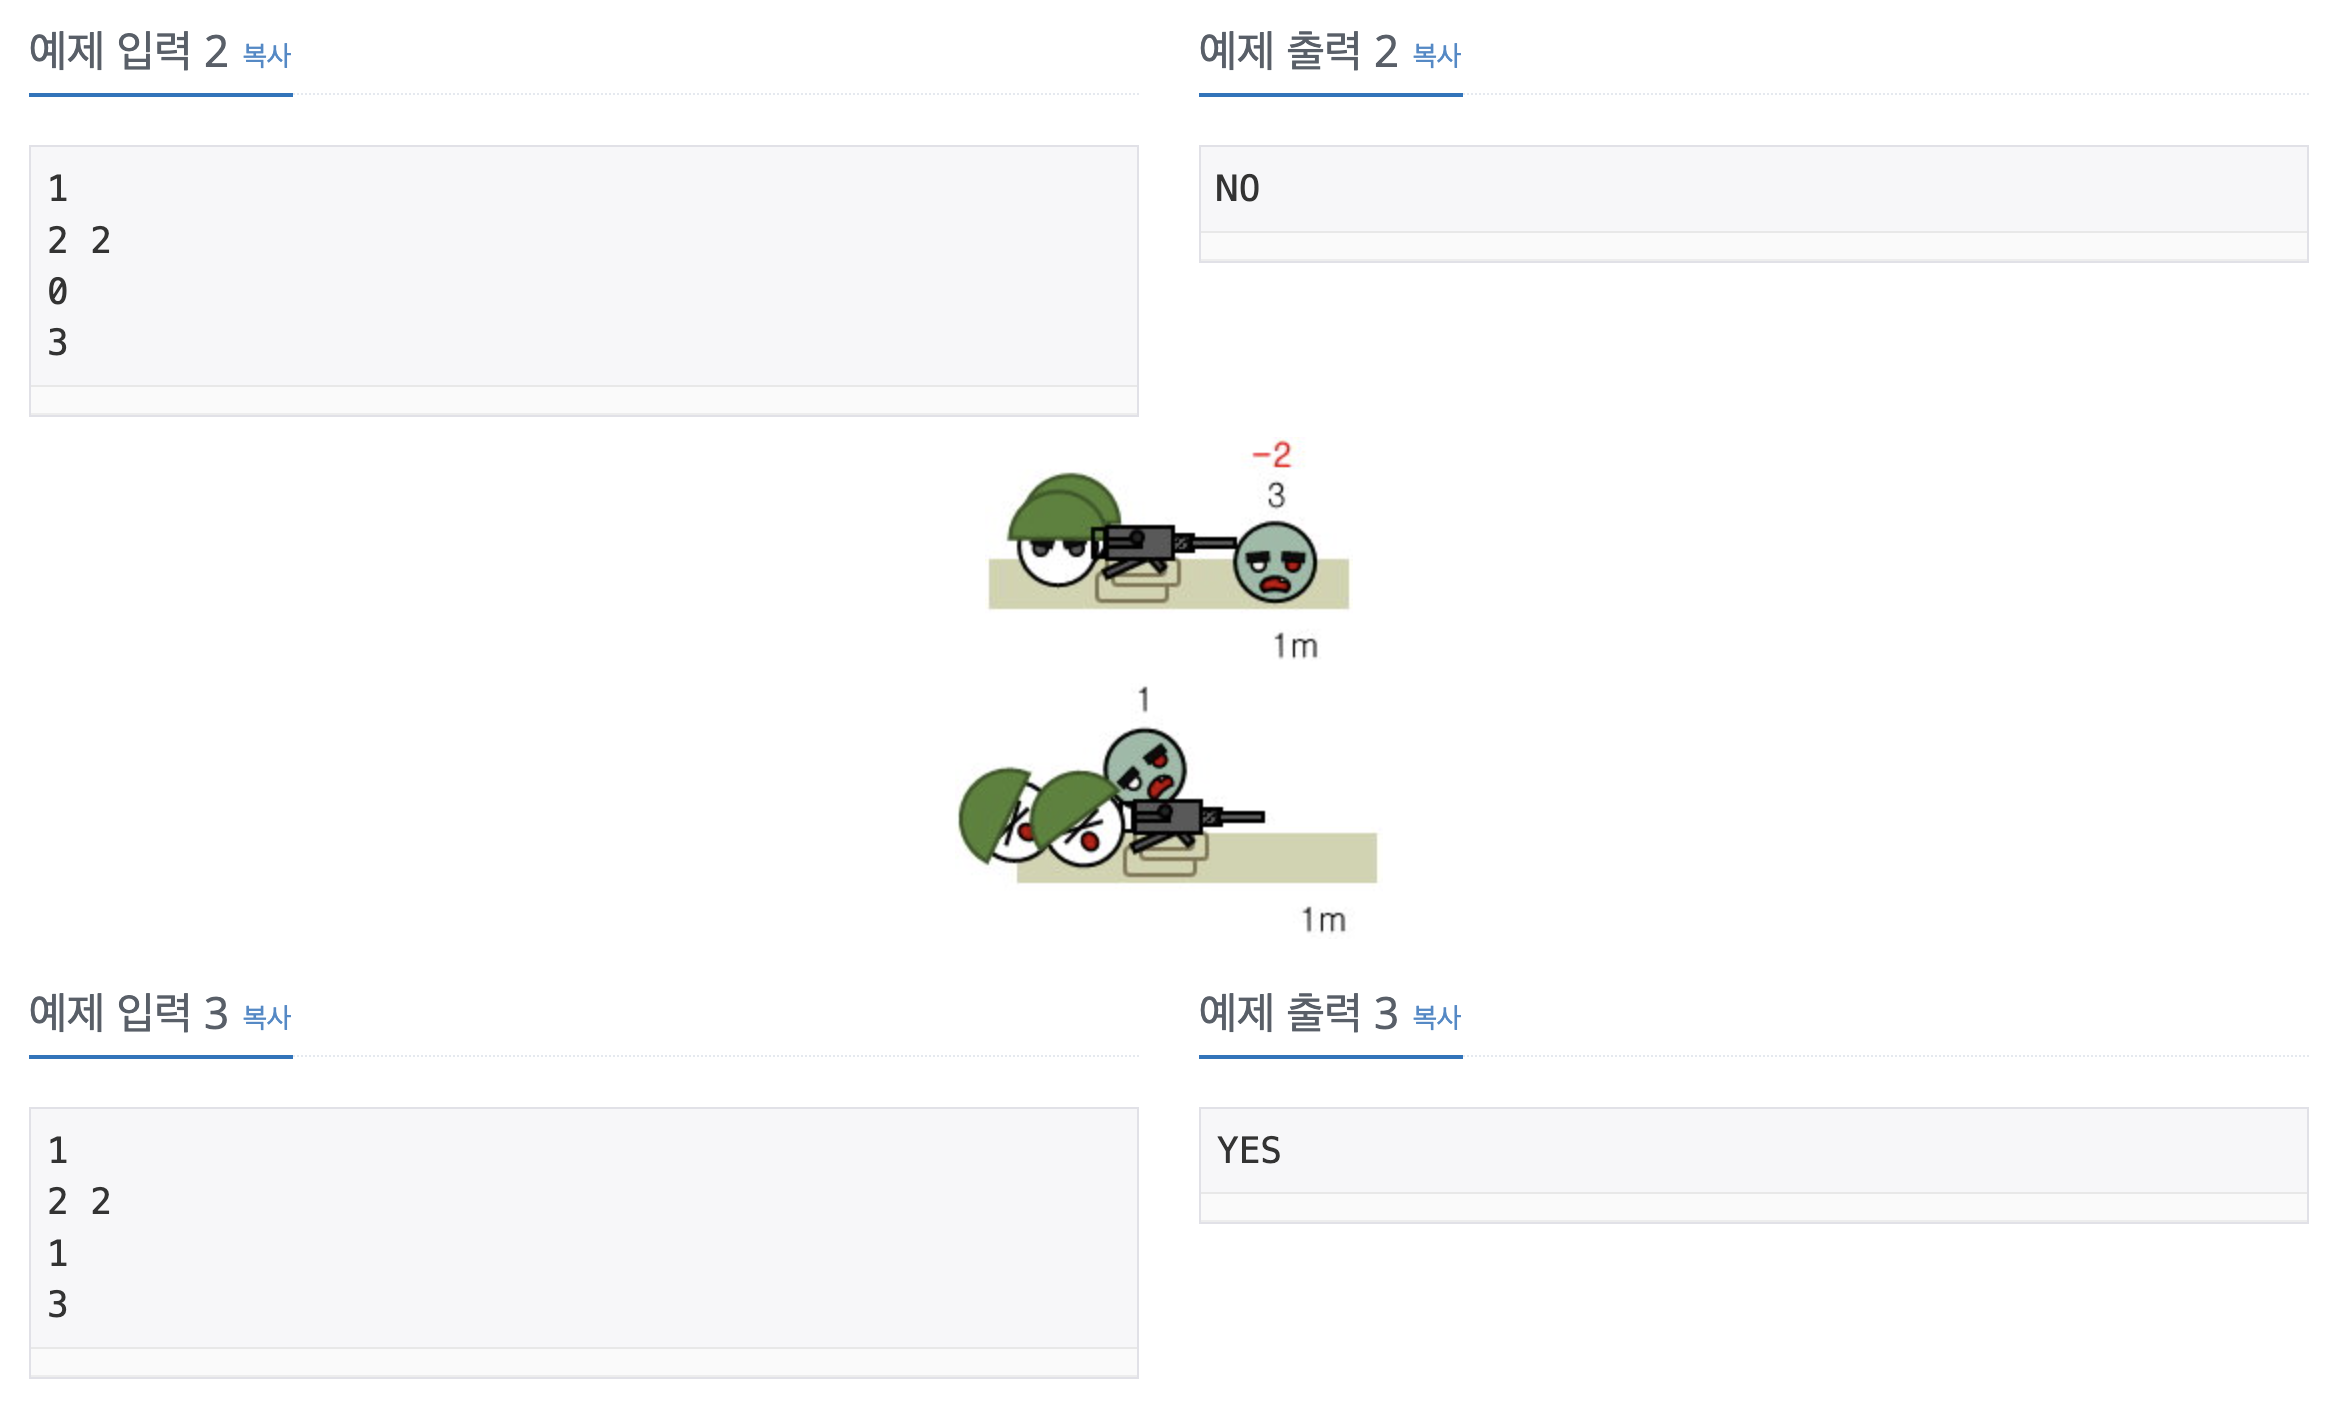
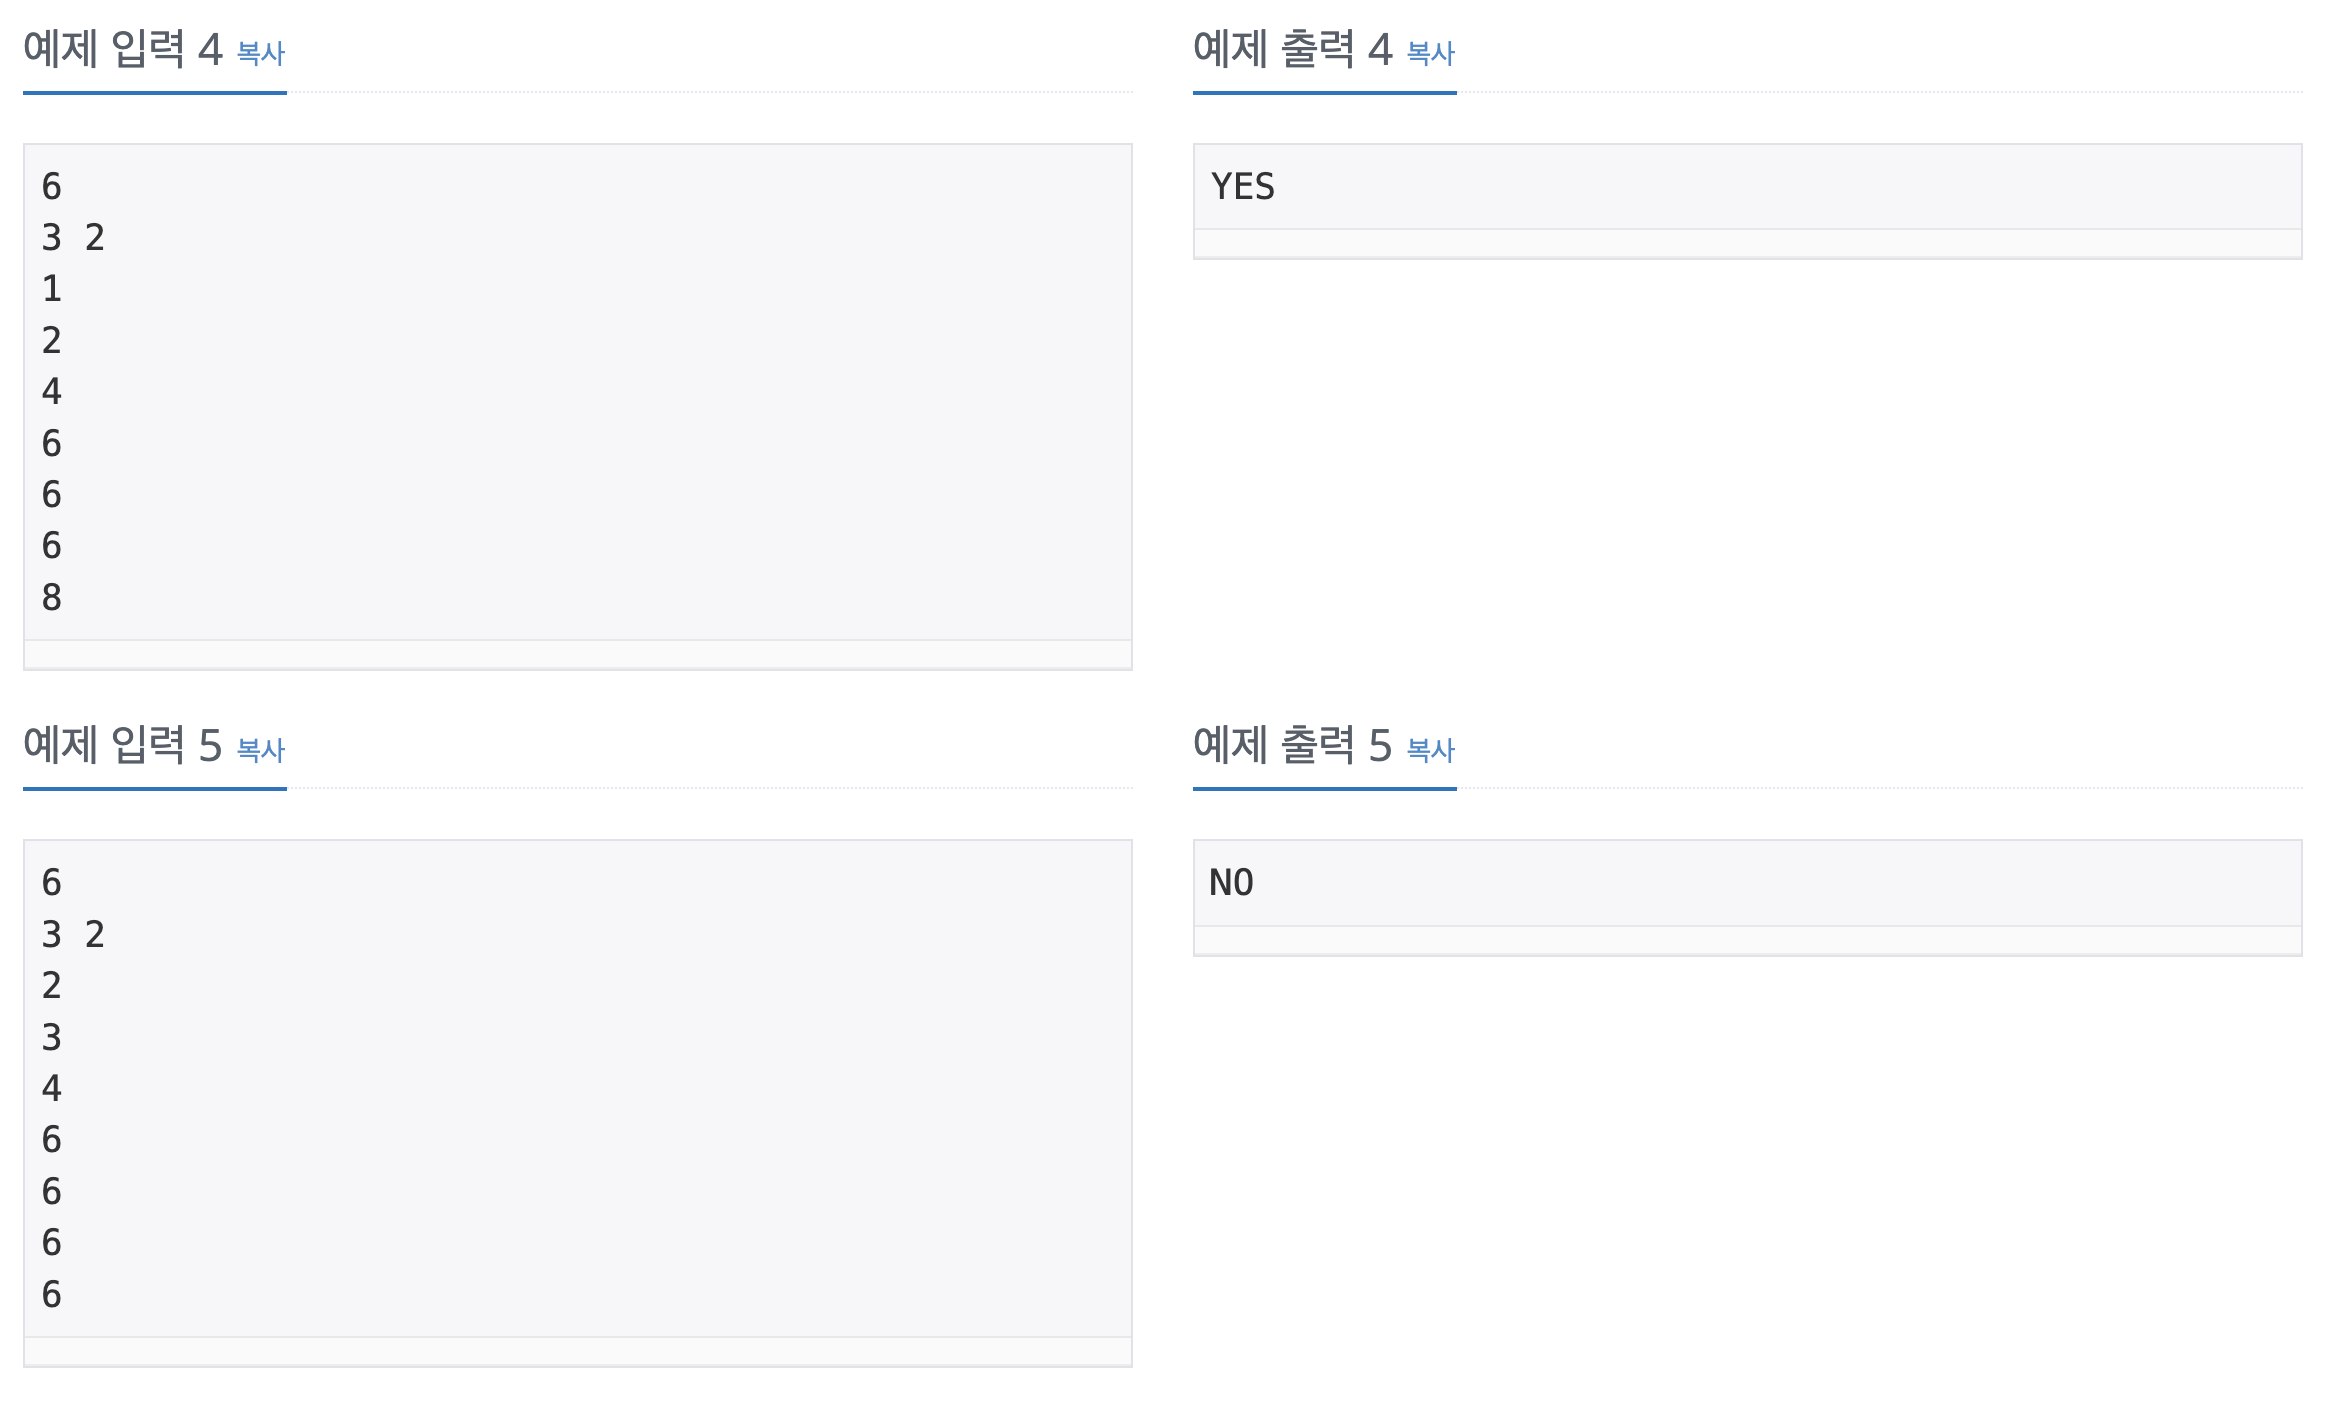

## step
- 기관총을 맞는 횟수
    - 사정거리 내에 있다면, i번 맞게 된다 ex) 2번째에 있는 좀비는 2번 맞게 된다
    - 사정거리 밖에 있다면, 사정거리에 들어오는 순간부터 맞게 되니까, 사정거리 수 인 ML번 맞게 된다

- 조건 1 : 총을 맞는 횟수 * 기관총 살상력 > 좀비 생명력
- 조건 1을 만족한다 : 살상 가능한 좀비
- 조건 1을 만족하지 못한다 : 살상 불가능한 좀비

- 조건 1을 만족하지 못하는 좀비 수 > 지뢰 수  ===> No
- 아니면 Yes

### 중요한 과정
- 위 과정에서 기관총으로 살상 불가능한 좀비를 지뢰로 처리하면, 총을 맞는 횟수는 전체적으로 1 감소한다
- 이 부분을 갱신해줘야 한다

- 참고코드
- https://velog.io/@be-kid/%EB%B0%B1%EC%A4%80-19644%EB%B2%88-%EC%A2%80%EB%B9%84-%EB%96%BC%EA%B0%80-%EA%B8%B0%EA%B4%80%EC%B4%9D-%EC%A7%84%EC%A7%80%EC%97%90%EB%8F%84-%EC%98%A4%EB%8B%A4%EB%8B%88

In [3]:
int(input())

5


5

In [6]:
from sys import stdin
from collections import deque

# input = stdin.readline

l = int(input()) #거리
ml, mk = map(int, input().split()) #사거리, 살상력
c = int(input()) #지뢰수
zombie = [int(input()) for i in range(l)] #좀비체력

q = deque()

count = 0 #큐 안에 0이 아닌 수가 있는지 카운트
ans = True #yer or no
for i in range(min(ml,l)):  #처음 큐 채워주기
    if len(q)==0:
            if zombie[0]-mk <= 0:
                q.append(0)
            else:
                q.append(zombie[0])
                count+=1
    else:
        if count == 0:
            if zombie[i]-mk*(i+1) <= 0:
                q.append(0)
            else:
                q.append(zombie[i]-mk*(i+1))
                count+=1
        else:
            if zombie[i]-mk*(i+1-count) <= 0:
                q.append(0)
            else:
                q.append(zombie[i]-mk*(i+1-count))
                count+=1

for i in range(ml,l): #나머지 좀비 진행
    if q[0] == 0:
        q.popleft()
        if zombie[i]-mk*(ml-count) <= 0:
            q.append(0)
        else:
            q.append(zombie[i]-mk*(ml-count))
            count+=1
    else:
        q.popleft()
        if c>0:
            c-=1
        else:
            ans = False
            break
            
    if zombie[i]-mk*(ml-count) <= 0:
        q.append(0)
        count-=1
        
    else:
        q.append(zombie[i]-mk*(ml-count))

if ans: #아직 살아남을 가능성이 있고
    while q: #q를 비우면서 확인
        if q[0] == 0:
            q.popleft()
        else:
            q.popleft()
            count-=1
            if c>0:
                c-=1
            else:
                ans = False
                break

if ans:
    print("YES")
else:
    print("NO")

6
3 2
2
3
4
6
6
6
6
NO


# 문제 3
- 컬러볼
- https://www.acmicpc.net/problem/10800

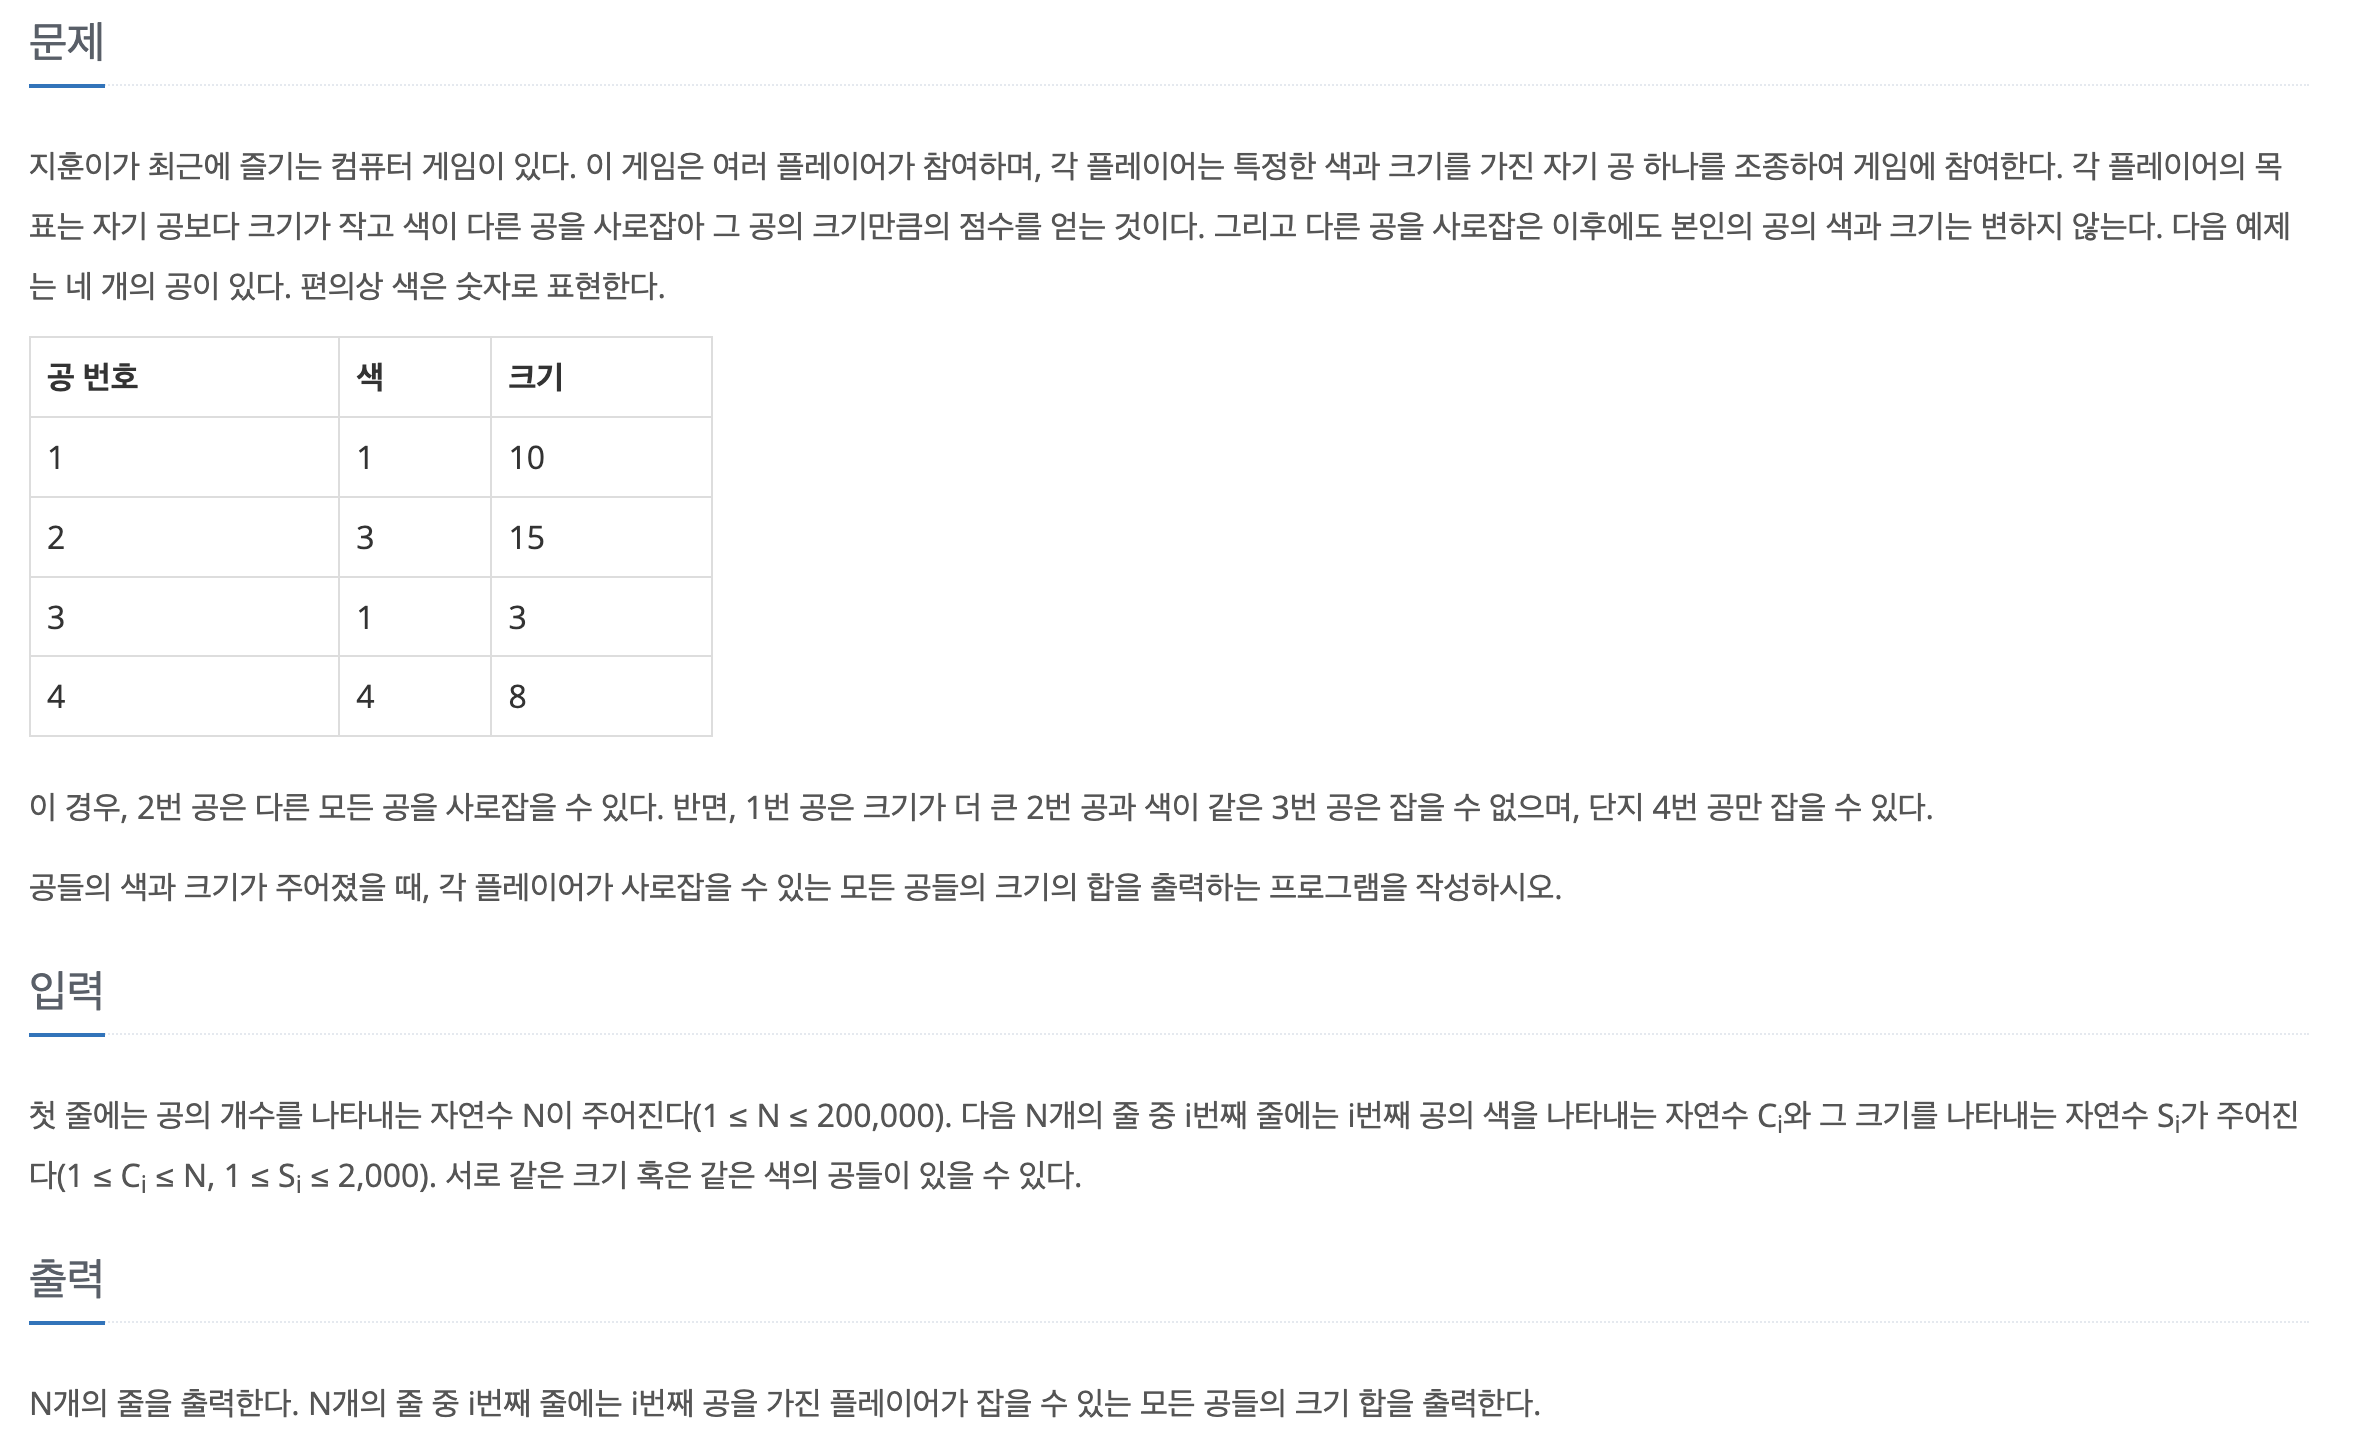
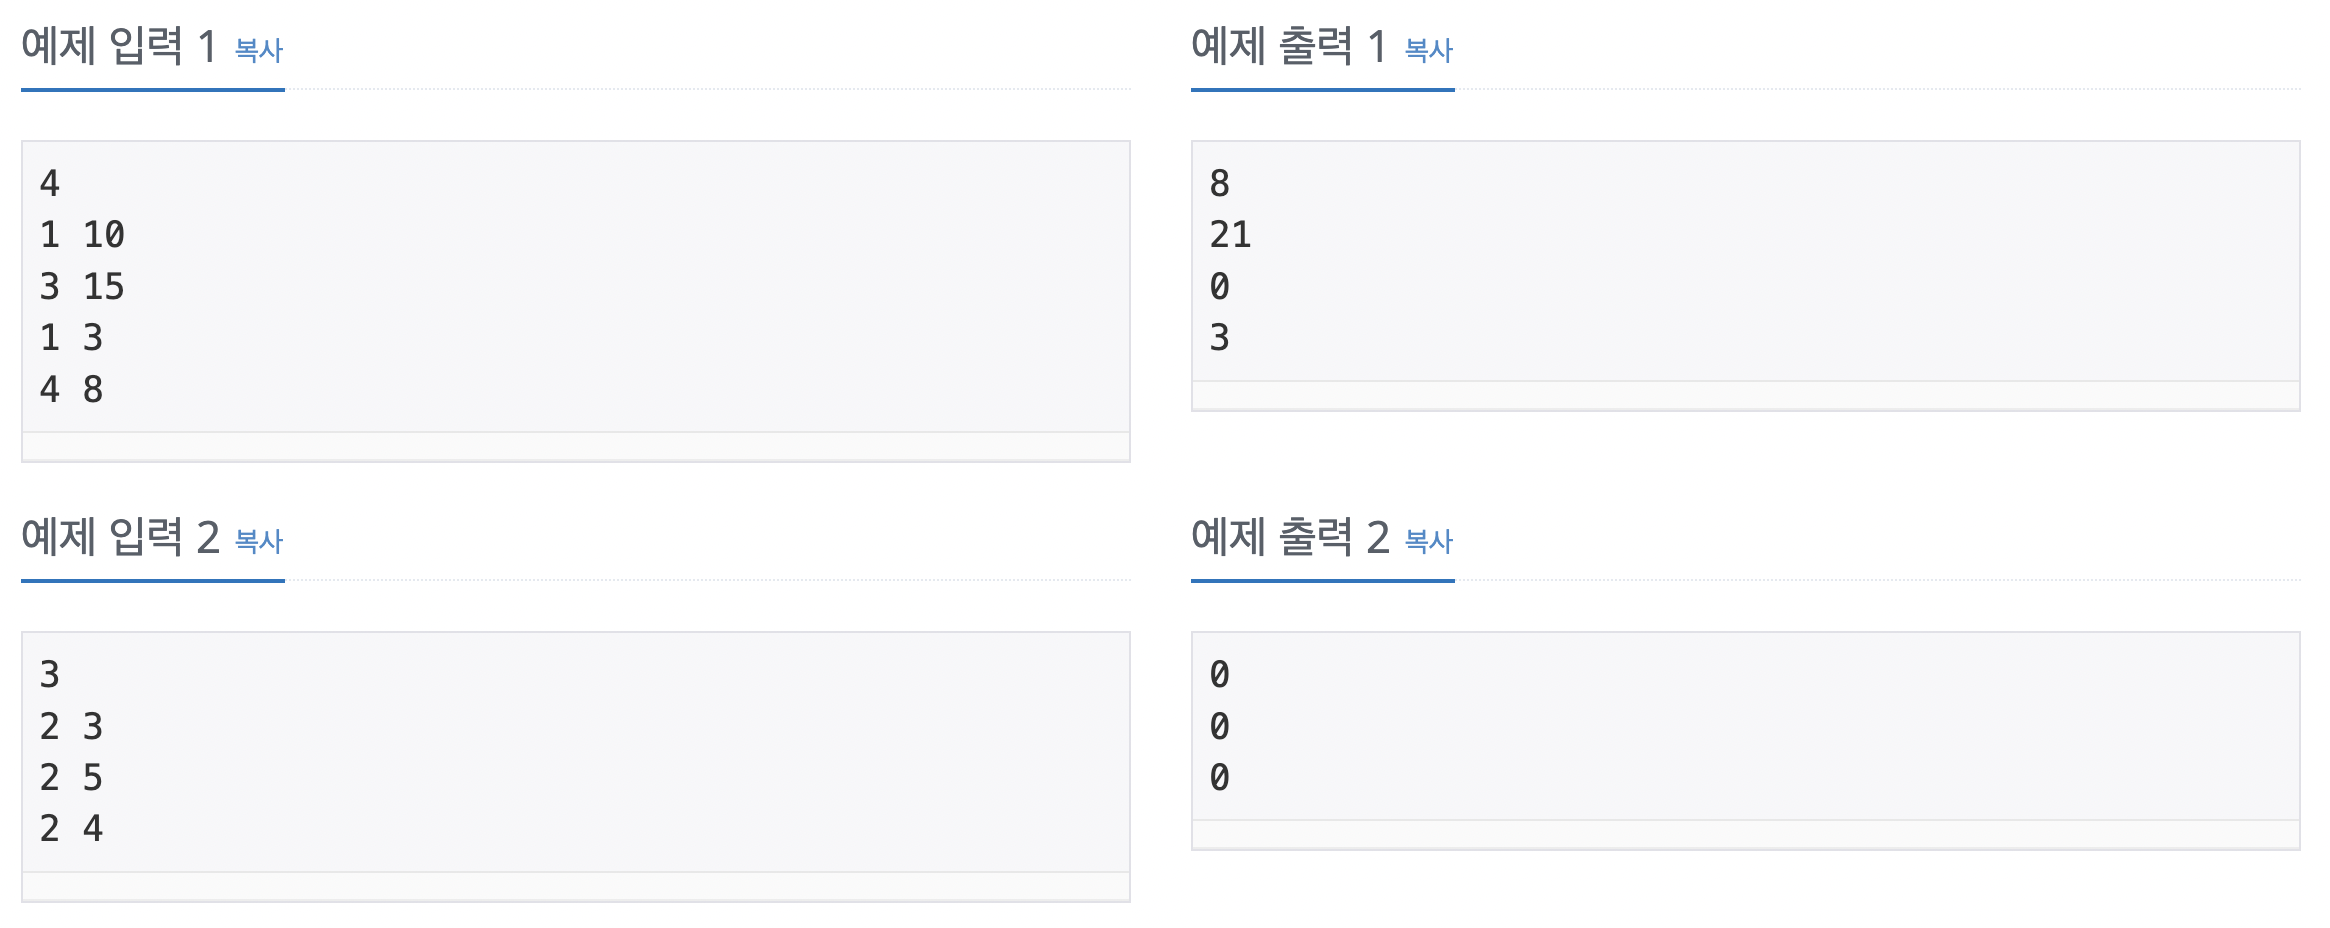

- 누적합 풀이
- 참고 코드
    - https://developerbee.tistory.com/126

In [1]:
import sys

# input = sys.stdin.readline
n = int(input())

balls = []
for i in range(n):
    c, s = map(int, input().split())
    balls.append([i, c, s])

balls.sort(key = lambda x : x[2])

s = 0
j = 0
color = [0] * (n + 1)
answer = [0] * n

for i in range(n):
    a = balls[i]
    b = balls[j]

    while b[2] < a[2]:
        s += b[2]
        color[b[1]] += b[2]
        j += 1
        b = balls[j]

    answer[a[0]] = s - color[a[1]]

print("\n".join(map(str, answer)))

4
1 10
3 15
1 3
4 8
8
21
0
3
